In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from wrangle import train_val_test
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.linear_model import LinearRegression
from math import sqrt

import wrangle 
import evaluate

seed = 55

## 1. Load your zillow dataset.

In [3]:
zillow = wrangle.get_zillow()
zillow = wrangle.drop_zill(zillow)

In [4]:
train, val, test = wrangle.train_val_test(zillow)

In [5]:
train.head(2)

,bed,bath,sqft,value,year,tax,fips
274677,3.0,2.0,2159.0,364577.0,1967.0,4517.62,6037.0
283102,2.0,1.0,1072.0,162390.0,1954.0,1996.96,6037.0


## 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft

In [6]:
# x and y train series
x_train = train[['sqft']]
y_train = train.tax

x_val = val[['sqft']]
y_val = val.tax

In [7]:
y_train.mean()

5613.675068463801

In [8]:
train['baseline'] = y_train.mean()

In [9]:
# assuming X and y are already defined
model = LinearRegression().fit(x_train, y_train)
predictions = model.predict(x_train)

In [10]:
train['yhat'] = predictions

In [11]:
train.head()

,bed,bath,sqft,value,year,tax,fips,baseline,yhat
274677,3.0,2.0,2159.0,364577.0,1967.0,4517.62,6037.0,5613.675068,6399.205686
283102,2.0,1.0,1072.0,162390.0,1954.0,1996.96,6037.0,5613.675068,3514.292124
1088474,4.0,3.0,2643.0,189091.0,1971.0,2434.06,6037.0,5613.675068,7683.748615
2015167,3.0,1.0,1008.0,52554.0,1956.0,1276.09,6037.0,5613.675068,3344.435208
667420,4.0,3.5,3574.0,1057690.0,2007.0,20070.98,6111.0,5613.675068,10154.635943


## 3. Plot the residuals for the linear regression model that you made.

In [12]:
train['residual'] = train.yhat - train.tax
train['residual_baseline'] = train.baseline - train.tax

In [13]:
train.head(2)

,bed,bath,sqft,value,year,tax,fips,baseline,yhat,residual,residual_baseline
274677,3.0,2.0,2159.0,364577.0,1967.0,4517.62,6037.0,5613.675068,6399.205686,1881.585686,1096.055068
283102,2.0,1.0,1072.0,162390.0,1954.0,1996.96,6037.0,5613.675068,3514.292124,1517.332124,3616.715068


<Axes: xlabel='tax', ylabel='residual_baseline'>

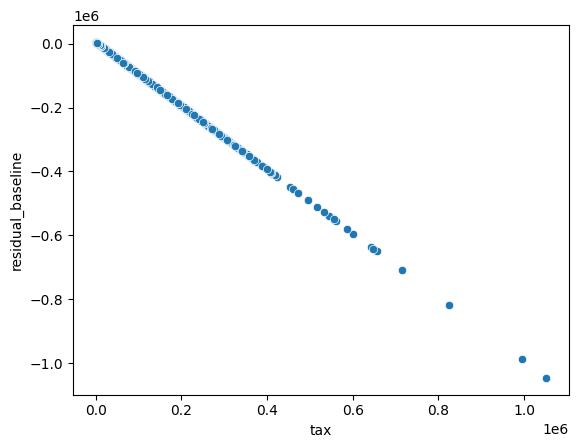

In [14]:
sns.scatterplot(data=train,x=y_train, y='residual_baseline')

<Axes: xlabel='tax', ylabel='residual'>

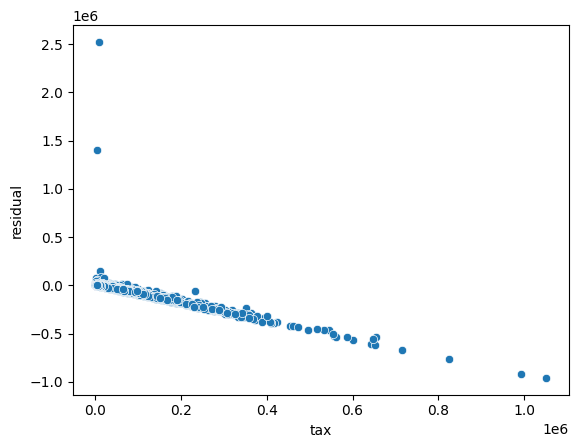

In [15]:
sns.scatterplot(data=train,x=y_train, y='residual')

## 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [16]:
train.head(2)

,bed,bath,sqft,value,year,tax,fips,baseline,yhat,residual,residual_baseline
274677,3.0,2.0,2159.0,364577.0,1967.0,4517.62,6037.0,5613.675068,6399.205686,1881.585686,1096.055068
283102,2.0,1.0,1072.0,162390.0,1954.0,1996.96,6037.0,5613.675068,3514.292124,1517.332124,3616.715068


In [17]:
sse = (train.residual **2).sum()
sse

73122343442408.48

In [18]:
ess = sum((train.yhat - train.tax.mean())**2)
ess

18249881794442.543

In [19]:
tss = ess + sse
tss

91372225236851.03

In [20]:
mse = sse/len(train)
mse

48807969.9167838

In [21]:
rsme = sqrt(mse)
rsme

6986.270100474488

## 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

In [22]:
train.head(2)

,bed,bath,sqft,value,year,tax,fips,baseline,yhat,residual,residual_baseline
274677,3.0,2.0,2159.0,364577.0,1967.0,4517.62,6037.0,5613.675068,6399.205686,1881.585686,1096.055068
283102,2.0,1.0,1072.0,162390.0,1954.0,1996.96,6037.0,5613.675068,3514.292124,1517.332124,3616.715068


In [23]:
sse_base = (train.residual_baseline **2).sum()
sse_base

91372225236846.42

In [24]:
ess_base = sum((train.baseline - train.tax.mean())**2)
ess_base

0.0

In [25]:
tss_base = ess_base + sse_base
tss_base

91372225236846.42

In [26]:
mse_base = sse_base/len(train)
mse_base

60989467.93331466

In [27]:
rsme_base = sqrt(mse_base)
rsme_base

7809.575400322008

## 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.



In [28]:
if sse < sse_base:
    print('Your model did better than baseline')
print(sse - sse_base)

Your model did better than baseline
-18249881794437.938


## 7. What is the amount of variance explained in your model?

In [29]:
explained_variance_score(y_train,train.yhat)

0.19973117374708038

## 8. Is your model better than the baseline model?

In [30]:
if sse < sse_base:
    print('Your model did better than baseline')
print(sse - sse_base)

Your model did better than baseline
-18249881794437.938


## 9. Create a file named evaluate.py that contains the following functions.

plot_residuals(y, yhat): creates a residual plot

regression_errors(y, yhat): returns the following values:

sum of squared errors (SSE)

explained sum of squares (ESS)

total sum of squares (TSS)

mean squared error (MSE)

root mean squared error (RMSE)

baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model

better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false


In [32]:
import evaluate.py